#Part 1: Using lightkurve package

##Get lightkurve package and other important packages for plotting

In [ ]:
#Install lightkurve package
!pip install lightkurve

#Import importance packages
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 6.2 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=6a9d94f4bdb906f44baf7eb3691ef05f57006784a4a3e1f553f97c7279694103
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=m

##Getting data from TESS mission

In [ ]:
#Search TOI-561 data from TESS using lk.search_lightcurve
#input target name and mission

search_result = lk.search_lightcurve('TOI-561', mission='TESS')

#Display search results
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 08,2019,SPOC,120,377064495,0.0
1,TESS Sector 08,2019,TESS-SPOC,1800,377064495,0.0
2,TESS Sector 08,2019,QLP,1800,377064495,0.0
3,TESS Sector 35,2021,SPOC,120,377064495,0.0
4,TESS Sector 35,2021,TESS-SPOC,600,377064495,0.0
5,TESS Sector 35,2021,QLP,600,377064495,0.0
6,TESS Sector 45,2021,SPOC,20,377064495,0.0
7,TESS Sector 45,2021,SPOC,120,377064495,0.0
8,TESS Sector 45,2021,TESS-SPOC,600,377064495,0.0


In [ ]:
#Select datasets, use TESS-SPOC

search_result[12]
data21= search_result[12]
data19 = search_result[1]


In [ ]:
#Download lightcurve data

lc21 = data21.download()
lc19 = data19.download()

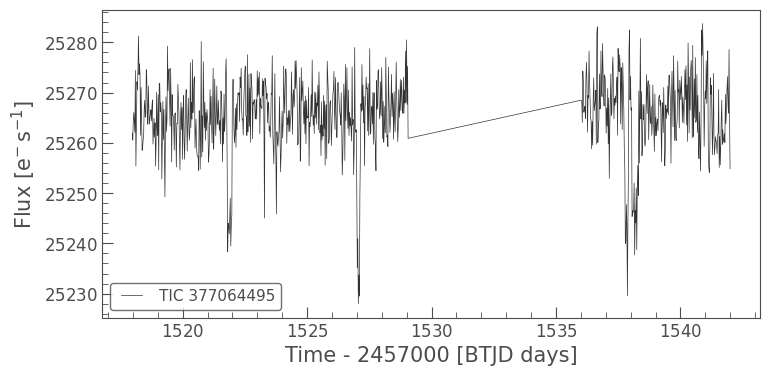

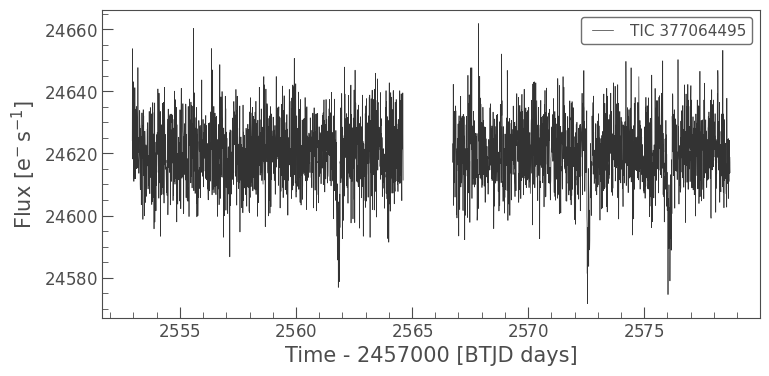

In [ ]:
#Plot light curves

#2019 light curve
lc19.plot();

#2021 lightcurve
lc21.plot();


###Plotting the data!

Text(0.5, 1.0, 'TOI-561 2019 photometry')

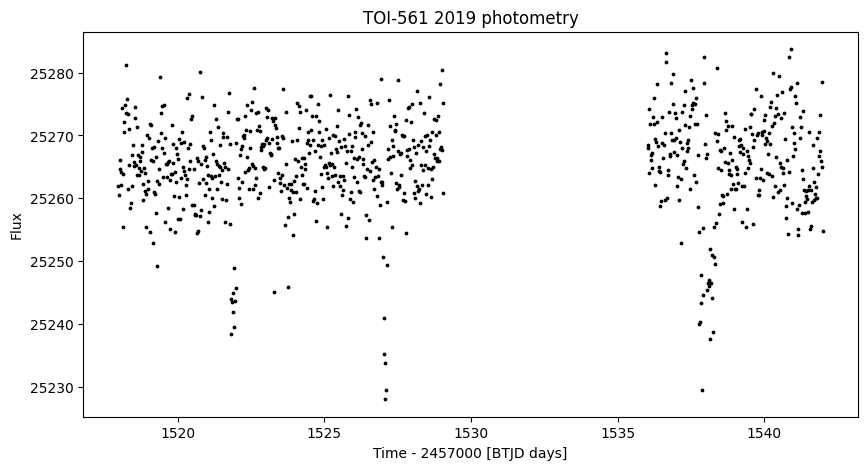

In [ ]:
#Plot 2019 data
from matplotlib.pyplot import figure


#create figure
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

#Get time,relative flux
time = np.array(lc19.time.value)
flux = np.array(lc19.flux.value)

plt.scatter(time,flux, s=3, color='k')
plt.xlabel('Time - 2457000 [BTJD days]')
plt.ylabel('Flux')
plt.title('TOI-561 2019 photometry')


Text(0.5, 1.0, 'TOI-561 2021 photometry')

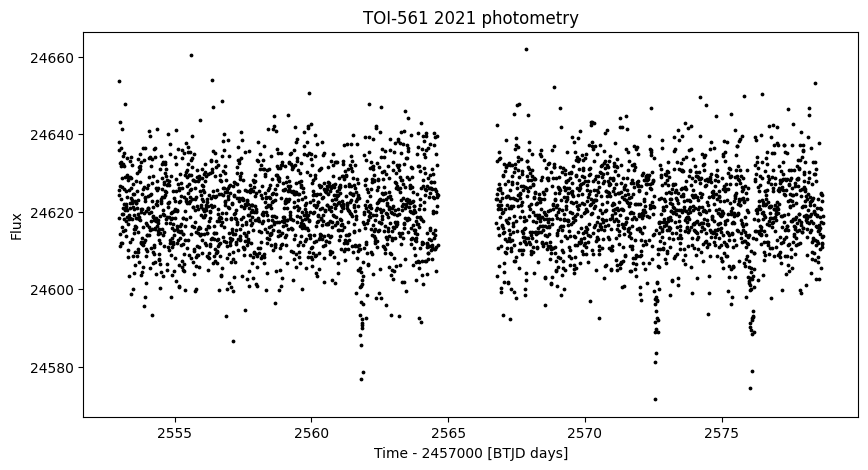

In [ ]:
#Plot 2021 data
from matplotlib.pyplot import figure


#create figure
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

#Get time,relative flux
time = np.array(lc21.time.value)
flux = np.array(lc21.flux.value)

plt.scatter(time,flux, s=3, color='k')
plt.xlabel('Time - 2457000 [BTJD days]')
plt.ylabel('Flux')
plt.title('TOI-561 2021 photometry')

###Looking at each transit

####2019 data

In [ ]:
#Create an interactive plot for 2019 data
time19 = np.array(lc19.time.value) #get time
flux19 = np.array(lc19.flux.value) #get flux

import plotly.express as px
fig = px.scatter(x=time19,y=flux19, width=1000, height=600)
fig.update_layout(
    title="2019 TOI-561 photometry",
    xaxis_title="Time - 2457000 [BTJD days]",
    yaxis_title="Relative Flux",
    font=dict(
        size=18,
        color="black"
    )
)

fig.show()

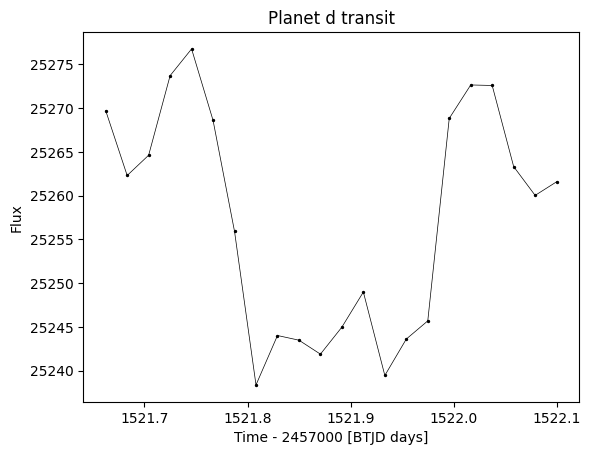

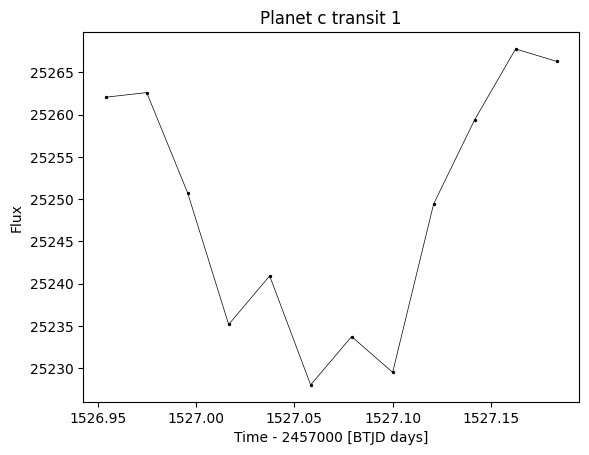

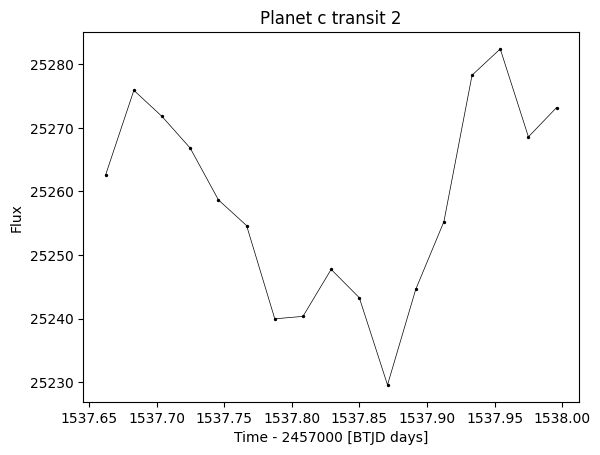

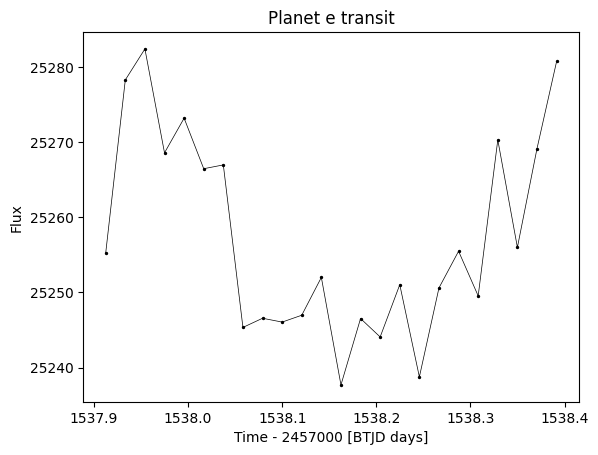

In [ ]:
#Use interactive plot to zoom in and get the range of time for transit of interest
#create function to plot wanted transit over range of time
def plottransit19(ts,tf,title):
  time19 = np.array(lc19.time.value)
  flux19 = np.array(lc19.flux.value)

  plt.scatter(time19[(time19 > ts) & (time19 < tf)],flux19[(time19 > ts) & (time19 < tf)],s=2,color='k')
  plt.plot(time19[(time19 > ts) & (time19 < tf)],flux19[(time19 > ts) & (time19 < tf)], linewidth=0.5, color='k')
  plt.title(title)
  plt.xlabel('Time - 2457000 [BTJD days]')
  plt.ylabel('Flux')
  return plt.show()

#plot transit
plottransit19(1521.65,1522.1, 'Planet d transit')
plottransit19(1526.95,1527.2, 'Planet c transit 1')
plottransit19(1537.65,1538, 'Planet c transit 2')
plottransit19(1537.9,1538.4, 'Planet e transit')

####2021 data

In [ ]:
#Create an interactive plot for 2021 data
time21 = np.array(lc21.time.value) #get time
flux21 = np.array(lc21.flux.value) #get flux

import plotly.express as px
fig = px.scatter(x=time21,y=flux21, width=1000, height=600)
fig.update_layout(
    title="2019 TOI-561 photometry",
    xaxis_title="Time - 2457000 [BTJD days]",
    yaxis_title="Relative Flux",
    font=dict(
        size=18,
        color="black"
    )
)

fig.show()

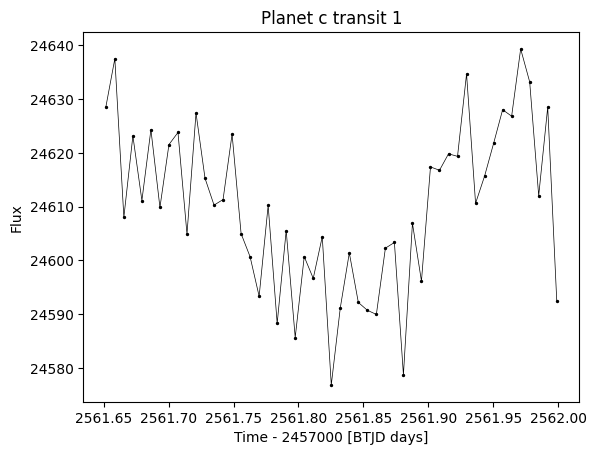

In [ ]:
#Use interactive plot to zoom in and get the range of time for transit of interest
#create function to plot wanted transit over range of time
def plottransit21(ts2,tf2,title2):
  time21 = np.array(lc21.time.value)
  flux21 = np.array(lc21.flux.value)

  plt.scatter(time21[(time21 > ts2) & (time21 < tf2)],flux21[(time21 > ts2) & (time21 < tf2)],s=2,color='k')
  plt.plot(time21[(time21 > ts2) & (time21 < tf2)],flux21[(time21 > ts2) & (time21 < tf2)], linewidth=0.5, color='k')
  plt.title(title2)
  plt.xlabel('Time - 2457000 [BTJD days]')
  plt.ylabel('Flux')
  return plt.show()

plottransit21(2561.65,2562,'Planet c transit 1')

##Getting data from other missions. For example, K2 mission

In [ ]:
#Search EPIC 220592745 data from K2 using lk.search_lightcurve
#input target name and mission

search_resultK = lk.search_lightcurve('EPIC 220592745', mission='K2')

#Display search results
search_resultK

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 08,2016,K2,1800,ktwo220592745,0.0
1,K2 Campaign 08,2016,EVEREST,1800,ktwo220592745,0.0
2,K2 Campaign 08,2016,K2SC,1800,ktwo220592745,0.0
3,K2 Campaign 08,2016,K2SFF,1800,ktwo220592745,0.0


In [ ]:
#Try repeating the steps from before to get your lightcurve plot!!

#your code here

#Part 2: Using K2 reduced light curves

##Import important packages

In [ ]:
# imports for importing files
from google.colab import files
import io
from io import StringIO

# imports for reading in data files and plotting
import numpy as np
import pandas as pd
import plotly.express as px

##Choose either method to get your data

###Upload data method 1: using wget

In [ ]:
#import example data
#you can replace the link after !wget with the link to your text file
!wget http://archive.stsci.edu/hlsps/k2sff/c18/211300000/11380/hlsp_k2sff_k2_lightcurve_211311380-c18_kepler_v1_llc-default-aper.txt

--2023-06-17 23:54:06--  http://archive.stsci.edu/hlsps/k2sff/c18/211300000/11380/hlsp_k2sff_k2_lightcurve_211311380-c18_kepler_v1_llc-default-aper.txt
Resolving archive.stsci.edu (archive.stsci.edu)... 130.167.201.60
Connecting to archive.stsci.edu (archive.stsci.edu)|130.167.201.60|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://archive.stsci.edu/hlsps/k2sff/c18/211300000/11380/hlsp_k2sff_k2_lightcurve_211311380-c18_kepler_v1_llc-default-aper.txt [following]
--2023-06-17 23:54:07--  https://archive.stsci.edu/hlsps/k2sff/c18/211300000/11380/hlsp_k2sff_k2_lightcurve_211311380-c18_kepler_v1_llc-default-aper.txt
Connecting to archive.stsci.edu (archive.stsci.edu)|130.167.201.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65715 (64K) [text/plain]
Saving to: ‘hlsp_k2sff_k2_lightcurve_211311380-c18_kepler_v1_llc-default-aper.txt.4’

hlsp_k2sff_k2_light 100%[===================>]  64.17K  --.-KB/s    in 0.1s    


In [ ]:
#Plot the example data
#Make sure to change the file name, columns name to match

#Since conveting .txt to .csv caused shifting in the columns' names. We have to shift the data and rename them.
#However, I created this nice function that you can just call it without having to repeat this process

data = pd.read_csv('hlsp_k2sff_k2_lightcurve_211311380-c18_kepler_v1_llc-default-aper.txt')
print("raw data \n",data)

def readdata(file):
  data = pd.read_csv(file)
  data = data.reset_index(level=0)
  data = data.rename(columns={'index': 'BJD - 2454833', 'BJD - 2454833': 'Corrected Flux'}) #change these names to match your data
  df = data.iloc[:, :-1]
  return df

df = readdata('hlsp_k2sff_k2_lightcurve_211311380-c18_kepler_v1_llc-default-aper.txt')
print("Corrected data \n",df)



raw data 
              BJD - 2454833   Corrected Flux
3420.221598       0.999703              NaN
3420.242030       0.999766              NaN
3420.262463       0.999659              NaN
3420.282895       0.999645              NaN
3420.303327       0.999640              NaN
...                    ...              ...
3469.298836       1.002335              NaN
3469.319268       1.002401              NaN
3469.339700       1.002410              NaN
3469.360131       1.002428              NaN
3469.380563       1.002466              NaN

[2265 rows x 2 columns]
Corrected data 
       BJD - 2454833  Corrected Flux
0       3420.221598        0.999703
1       3420.242030        0.999766
2       3420.262463        0.999659
3       3420.282895        0.999645
4       3420.303327        0.999640
...             ...             ...
2260    3469.298836        1.002335
2261    3469.319268        1.002401
2262    3469.339700        1.002410
2263    3469.360131        1.002428
2264    3469.380563    

###Upload data file method 2: upload csv file

1. Go to data portal https://lweb.cfa.harvard.edu/~avanderb/k2.html
2. Choose the campaign you're interested in. If you have target system, look up which campaign has the target you want to access.
3. For example, looking at campaign 18: https://lweb.cfa.harvard.edu/~avanderb/allk2c18obs.html
4. Download the .txt file of your target's data
5. Here, we're working in .csv file. You can upload the txt file to google sheets or Microsoft excel and export that data as .csv file
6. Run the code below and upload it here

*everytime you re-run this notebook, you'll have to re-upload the data files as well.

In [ ]:
# Make a push button for uploading files
# Run the cell then push the button
uploaded = files.upload()

In [ ]:
#Import your file into pandas data frame
df = pd.read_csv(io.BytesIO(uploaded['your file name here.csv']),)
df

,BJD - 2454833,Corrected Flux
0,3420.221598,0.999703
1,3420.242030,0.999766
2,3420.262463,0.999659
3,3420.282895,0.999645
4,3420.303327,0.999640
...,...,...
2260,3469.298836,1.002335
2261,3469.319268,1.002401
2262,3469.339700,1.002410
2263,3469.360131,1.002428


##Plot your data

In [ ]:
#This will make an interactive plot
#From the plot you can zoom, pan, and save as a png

fig = px.scatter(data_frame=df, x="BJD - 2454833", y="Corrected Flux", width=1000, height=800)
fig.show()

#Thank you:
- https://avanderburg.github.io/tutorial/tutorial.html
- Professor Kim McLeod